In [2]:
import os
import cv2

In [3]:
image  = cv2.imread("C:/Users/Miyazaki/Desktop/20211030/ce02/2850sub.png")


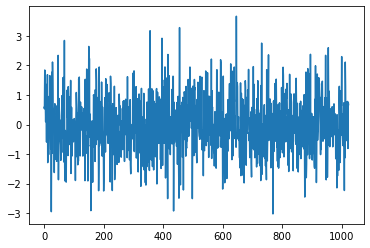

In [6]:
import numpy  as np
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

dlen = 1024 #ノイズデータのデータ長
mean = 0.0  #ノイズの平均値
std  = 1.0  #ノイズの分散

y = np.array( [random.gauss(mean, std) for i in range(dlen)] )

plt.plot(y)
plt.show()


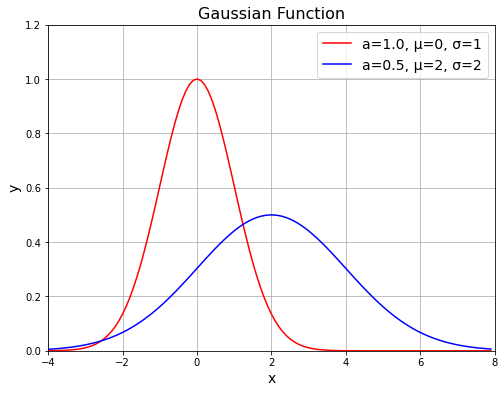

In [12]:
# GAUSSIAN_01

import numpy as np
import matplotlib.pyplot as plt

# ガウス関数を定義
def gauss(x, amp=1, mean=0, std=1):
    return amp * np.exp(-(x - mean)**2 / (2*std**2))

# Figureを作成
fig = plt.figure(figsize=(8, 6))

# FigureにAxesを追加
ax = fig.add_subplot(111)

# Axesのタイトルを'Gaussian Function'に設定
ax.set_title("Gaussian Function", fontsize=16)

# 目盛線を表示
ax.grid()

# 軸ラベルを設定
ax.set_xlabel("x", fontsize=14)
ax.set_ylabel("y", fontsize=14)

# 軸範囲を設定
ax.set_xlim([-4, 8])
ax.set_ylim([0, 1.2])

# -4～8まで0.1刻みの数値の配列
x = np.arange(-4, 8, 0.1)

# グラフに描く関数
f1 = gauss(x)
f2 = gauss(x, amp=0.5, mean=2, std=2)

# Axesにガウス関数を描画
ax.plot(x, f1, color="red", label="a=1.0, μ=0, σ=1")
ax.plot(x, f2, color="blue", label="a=0.5, μ=2, σ=2")

# 凡例の表示
ax.legend(fontsize=14)

In [13]:

np.savetxt('C:/Users/Miyazaki/Desktop/Simulation/gnoise.csv', y)

In [14]:
np.savetxt('C:/Users/Miyazaki/Desktop/Simulation/gauss.csv', f1)


In [44]:
dlen = 1024 #ノイズデータのデータ長
mean = 0.0  #ノイズの平均値
std  = 1.0  #ノイズの分散
x = np.arange(-5.12, 5.12, 0.01)
test_noise =  np.array( [random.gauss(mean, std) for i in range(dlen)] )
test_gauss = gauss(x, amp=1, mean=0, std=1 )

In [45]:
test = test_noise + test_gauss
test

array([-0.29846926, -0.97531773,  0.14283837, ..., -0.88135701,
        1.69520705, -0.05890321])

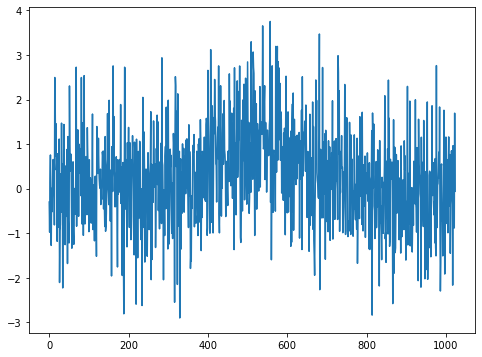

In [46]:
fig = plt.figure(figsize=(8, 6))

# FigureにAxesを追加
ax = fig.add_subplot(111)
ax.plot(test)

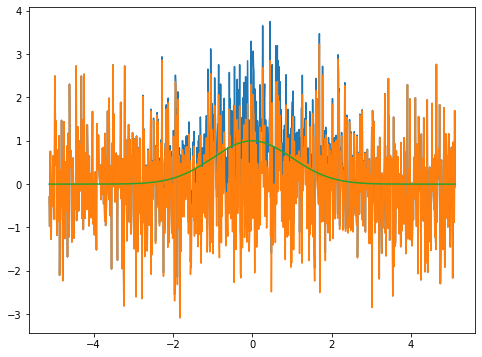

In [47]:
fig = plt.figure(figsize=(8, 6))

# FigureにAxesを追加
ax = fig.add_subplot(111)
ax.plot(x, test)
ax.plot(x, test_noise)
ax.plot(x, test_gauss)

In [48]:
np.savetxt('C:/Users/Miyazaki/Desktop/Simulation/test2.csv', test)

In [64]:
np.savetxt('C:/Users/Miyazaki/Desktop/Simulation/axis.csv', x)



In [153]:
# 幅と中心位置がわかっているから良い　という主張もできるといいな
def simulation_data_gen(prefix,
                        datapoints = 1024,
                        noise_amp=1,
                        noise_mean=0,
                        noise_std=1,
                        gauss_amp=1,
                        gauss_mean=0,
                        gauss_std=1,
                        iter_num = 10):
    os.makedirs("./simulation_data_{}".format(prefix), exist_ok=True)
    os.chdir("./simulation_data_{}".format(prefix))
    data = np.zeros(datapoints)
    for i in range(iter_num):
        #make x axis
        x_axis = np.linspace(-1, 1, datapoints)
        noise_data = np.array([random.gauss(noise_mean, noise_std)
                               for i
                               in range(datapoints)])
        gauss_data = gauss_amp * np.exp(-(x_axis - gauss_mean)**2 / (gauss_std**2))
        tempdata = noise_data + gauss_data
        data = np.vstack([data, tempdata])
    data= data.T
    df = pd.DataFrame(data)
    np.savetxt('./x_axis.csv', x_axis)
    df.to_csv("./data_{}.csv".format(prefix))
    return data

In [154]:
os.getcwd()

'C:\\Users\\Miyazaki\\Desktop\\Simulation\\simulation_data_test2\\simulation_data_amp1'

In [155]:
os.chdir("C:/Users/Miyazaki/Desktop/Simulation")


In [156]:
data = simulation_data_gen("amp1",
                        datapoints = 1024,
                        noise_amp=1,
                        noise_mean=0,
                        noise_std=1,
                        gauss_amp=1,
                        gauss_mean=0,
                        gauss_std=0.25,
                        iter_num = 10)
data

array([[ 0.        , -1.96729325, -0.250733  , ...,  1.7898893 ,
        -1.51573445,  1.59127392],
       [ 0.        , -0.51538638,  1.55119324, ..., -0.22181691,
        -1.22339627,  1.26886715],
       [ 0.        ,  0.14275566, -0.88418727, ...,  0.8492327 ,
         0.82854533,  0.11534002],
       ...,
       [ 0.        , -0.28072701, -1.18919788, ...,  0.72581905,
         0.23322098,  0.9404858 ],
       [ 0.        , -0.55637117, -1.50352106, ..., -0.76061332,
         0.25245797,  0.64568672],
       [ 0.        , -0.89649364,  0.67909097, ...,  0.5084434 ,
         0.58844044,  0.64430407]])